<a href="https://colab.research.google.com/github/Suraj-Khedkar/Fakenews_detector/blob/main/Fake_News_Detection_(2016_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection using Machine Learning**
 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Read datasets**

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/ML Fake News Detection/2016 Election Data/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/ML Fake News Detection/2016 Election Data/True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

# **Data cleaning and preparation**

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,Three lawmakers question Kushner Cos on concer...,WASHINGTON (Reuters) - Three Democratic lawmak...,politicsNews,"June 2, 2017",true
1,Tillerson 'offended' by claims of State Depart...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"November 28, 2017",true
2,FBI Warns Philly Colleges Of Threat On Monday:...,The FBI photo warning is from Drexel Universit...,Government News,"Oct 4, 2015",fake
3,"Defying Trump, over 120 countries at U.N. cond...",UNITED NATIONS (Reuters) - More than 120 count...,worldnews,"December 21, 2017",true
4,Conflict over Russia is rocky start for Trump ...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"December 11, 2016",true


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Three lawmakers question Kushner Cos on concer...,WASHINGTON (Reuters) - Three Democratic lawmak...,politicsNews,true
1,Tillerson 'offended' by claims of State Depart...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,true
2,FBI Warns Philly Colleges Of Threat On Monday:...,The FBI photo warning is from Drexel Universit...,Government News,fake
3,"Defying Trump, over 120 countries at U.N. cond...",UNITED NATIONS (Reuters) - More than 120 count...,worldnews,true
4,Conflict over Russia is rocky start for Trump ...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,true


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - Three Democratic lawmak...,politicsNews,true
1,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,true
2,The FBI photo warning is from Drexel Universit...,Government News,fake
3,UNITED NATIONS (Reuters) - More than 120 count...,worldnews,true
4,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,true


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - three democratic lawmak...,politicsNews,true
1,washington (reuters) - u.s. secretary of state...,politicsNews,true
2,the fbi photo warning is from drexel universit...,Government News,fake
3,united nations (reuters) - more than 120 count...,worldnews,true
4,washington (reuters) - president-elect donald ...,politicsNews,true


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,washington reuters three democratic lawmakers...,politicsNews,true
1,washington reuters us secretary of state rex ...,politicsNews,true
2,the fbi photo warning is from drexel universit...,Government News,fake
3,united nations reuters more than 120 countrie...,worldnews,true
4,washington reuters presidentelect donald trum...,politicsNews,true


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,washington reuters three democratic lawmakers ...,politicsNews,true
1,washington reuters us secretary state rex till...,politicsNews,true
2,fbi photo warning drexel university colleges u...,Government News,fake
3,united nations reuters 120 countries defied pr...,worldnews,true
4,washington reuters presidentelect donald trump...,politicsNews,true


# **Data Visualisation**

## How many articles per subject?

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


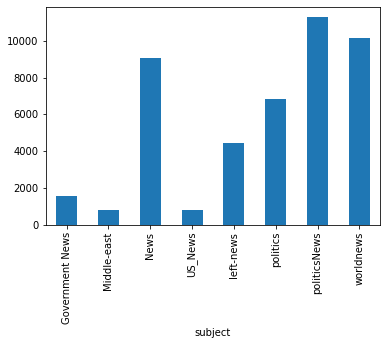

In [ ]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

## How many fake and real articles?

target
fake    23481
true    21417
Name: text, dtype: int64


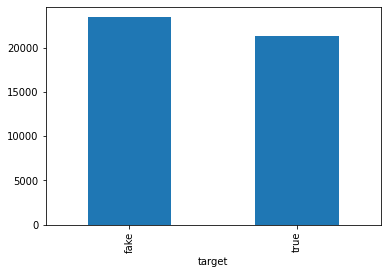

In [ ]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

## Word cloud for fake news

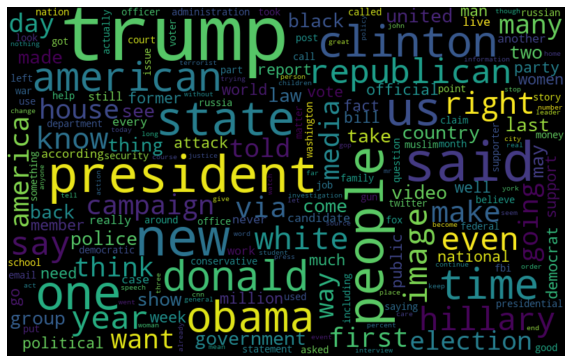

In [ ]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud for real news


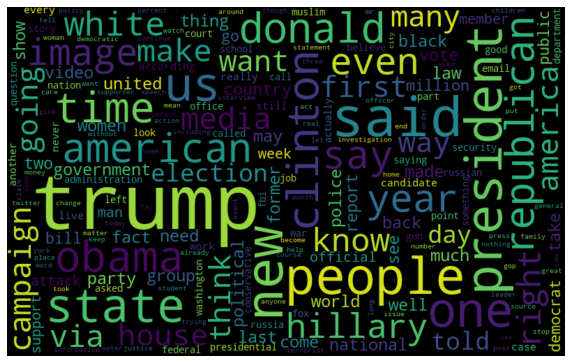

In [ ]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words counter

### (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector) 

In [ ]:
  from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

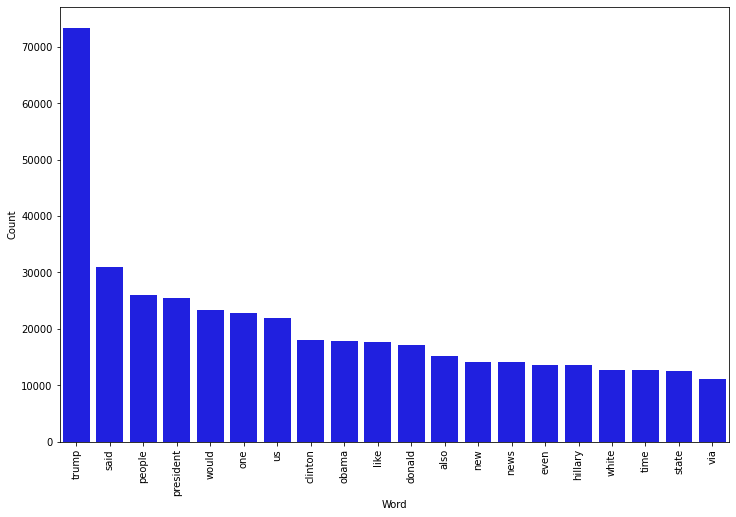

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

### Most frequent words in real news

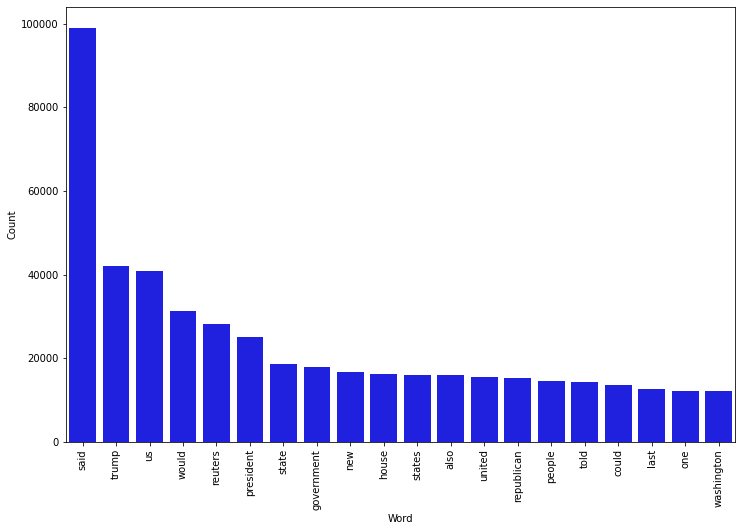

In [ ]:
counter(data[data["target"] == "true"], "text", 20)

# **Modeling**

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Peparing the data**

**20% testing ratio**

In [ ]:
# Split the data
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000)
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35918,) (8980,) (35918,) (8980,)


In [ ]:
models=[]

# **Multinomial Naive Bayes (<1 min. Runtime)**




In [ ]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

NB = pipe.fit(X_train, y_train)
models.append('NB')
prediction = NB.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.18%
recall: 96.62%
F1 Score: 95.06%
Precision Score: 93.56%


Confusion matrix, without normalization


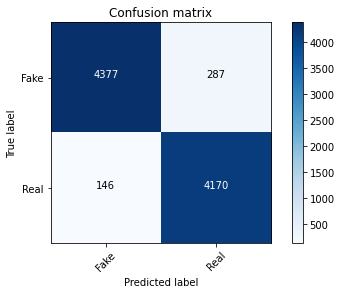

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression (<1 min. Runtime)**

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
LR = pipe.fit(X_train, y_train)
models.append('LR')
# Accuracy
prediction = LR.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.11%
recall: 99.17%
F1 Score: 99.07%
Precision Score: 98.98%


Confusion matrix, without normalization


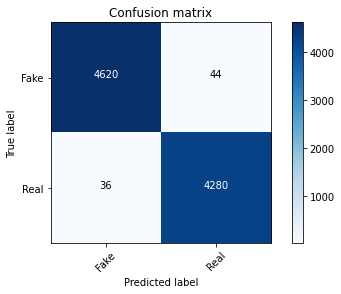

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree (<1 min. Runtime)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
DT = pipe.fit(X_train, y_train)
models.append(DT)
# Accuracy
prediction = DT.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.69%
recall: 99.65%
F1 Score: 99.68%
Precision Score: 99.7%


Confusion matrix, without normalization


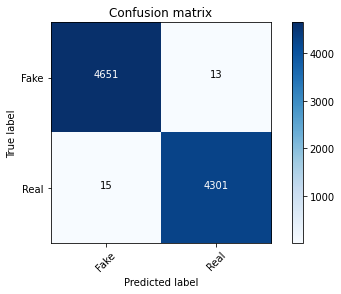

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest (<1 min. Runtime)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

RF = pipe.fit(X_train, y_train)
models.append('RF')
prediction = RF.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.13%
recall: 99.17%
F1 Score: 99.1%
Precision Score: 99.03%


Confusion matrix, without normalization


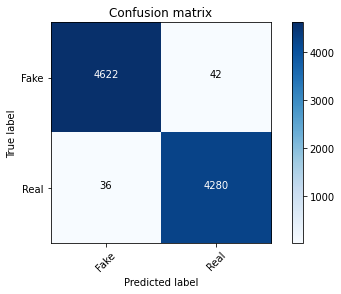

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **SVM**

In [ ]:
from sklearn import svm

##Linear Kernel (15M Runtime)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

SVML = pipe.fit(X_train, y_train)
models.append('SVML')
prediction = SVML.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['SVM Linear'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.55%
recall: 99.54%
F1 Score: 99.54%
Precision Score: 99.54%


Confusion matrix, without normalization


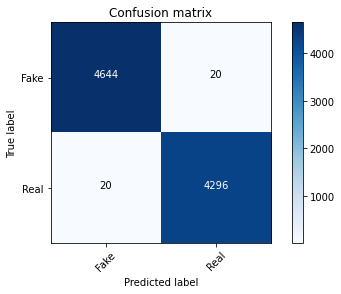

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Polynomial Kernel (2H Runtime)

In [ ]:
# #Create a svm Classifier
# clf = svm.SVC(kernel='poly') # Polynomial Kernel

# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', clf)])

# model = pipe.fit(X_train, y_train)
# prediction = model.predict(X_test)
# print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# dct['SVM Polynomial'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
# cm = metrics.confusion_matrix(y_test, prediction)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Gaussian Radial Basis Formula (42M Runtime)

In [ ]:
# #Create a svm Classifier
# clf = svm.SVC(kernel='rbf') # RBF Kernel

# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', clf)])

# model = pipe.fit(X_train, y_train)
# prediction = model.predict(X_test)
# print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# dct['SVM RBF'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
# cm = metrics.confusion_matrix(y_test, prediction)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Sigmoid Kernel (15M Runtime)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Sigmoid Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

SVMS = pipe.fit(X_train, y_train)
models.append('SVMS')
prediction = SVMS.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label="true")*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction, pos_label="true")*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test, prediction, pos_label="true")*100,2)))

dct['SVM Sigmoid'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.51%
recall: 99.56%
F1 Score: 99.49%
Precision Score: 99.42%


Confusion matrix, without normalization


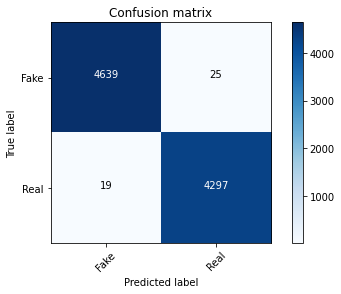

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

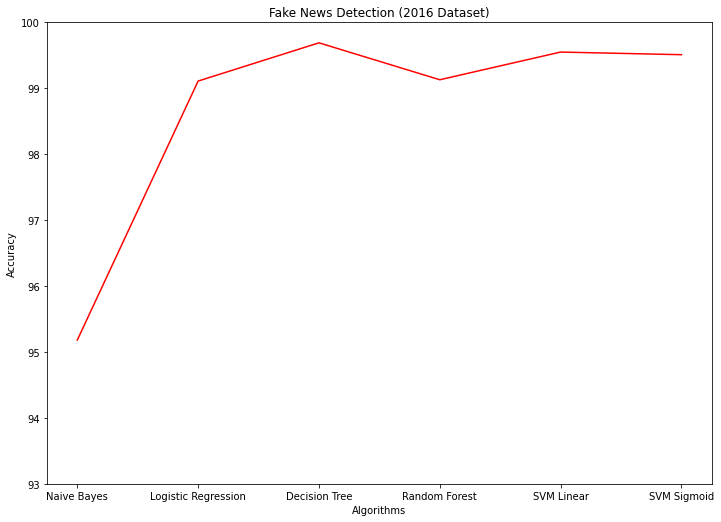

In [ ]:
import seaborn
plt.figure(figsize=(10,7))
plt.ylim(93,100)

plt.tight_layout()

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

plt.title("Fake News Detection (2016 Dataset)")

seaborn.lineplot(x=dct.keys(), y=dct.values(), color="red")

plt.show()

# **Prediction**

**Removing Punctuations and Stopwords**

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/ML Fake News Detection/Kaggle Fake News Dataset/test.csv")

In [ ]:
test['text'] = test['text'].astype(str)
test['text'] = test['text'].apply(lambda x: x.lower())

**Remove Punctuations, Symbols And Stopwords**

In [ ]:
test['text'] = test['text'].str.replace('[^\w\s]', '')
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,palo alto calif years scorning political proce...
1,20801,Russian warships ready to strike terrorists ne...,NaN,russian warships ready strike terrorists near ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,videos nodapl native american leaders vow stay...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,first dont succeed try different sport tim teb...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 views 0 comments 0 likes first t...


In [ ]:
ub = test.shape[0]

In [ ]:
from random import randint

In [ ]:
n = randint(0,ub)
test.text[n]

'san francisco chinese man visiting family california became neighbors worst nightmare found days later missing dog eaten strange visitor 34year old plumber beijing since arrested seem grief couples favorite companion 7year old german shepherd theyve since puppy mans family argued defense country common eat dog meat acknowledged right eat neighbors dog without consent also offered replace dog another one help ease pain loss known suffer gruesome ordeal wouldve never picked animal shelter explains owner still visibly shock neighbors discovered horror dog slain neighbors witnessed man chinese origin grilling seemed pieces dog meat onto barbecue also pieces fur found lying top garbage container wanted us find oblivious fact cared dog piece meat admitted horrified neighbors humphrey given proper burial even though man cooked large parts dog police officers arrived scene apprehended perpetrator buried parts could find horrible mess added dogs owner fighting contain tears hope awful man goes

In [ ]:
predictions=[]
query=test.text[n]
# ans=test.label[n]

predictions.append(RF.predict([query])[0]) #Random Forest
predictions.append(DT.predict([query])[0]) #Decision Tree
predictions.append(LR.predict([query])[0]) #Logistic Regression
predictions.append(NB.predict([query])[0]) #Naive Bayse
predictions.append(SVML.predict([query])[0]) #SVM Linear
predictions.append(SVMS.predict([query])[0]) #SVM Sigmoid

print(predictions)
# print(ans)

['fake', 'fake', 'fake', 'fake', 'fake', 'fake']
